## Econ 148 Lecture Notebook - Jan 30 2023

 NASA example from Dan Hammer Data 88
 
 Astronomy Picture of the Day  - has a public / demo API

In [21]:
import requests
import pandas
import matplotlib.pyplot as plt
import numpy as np
import io
import urllib.request
from PIL import Image

In [22]:
# basic location, on the Internet, someone else's computer rather than ours locally
# like a directory.
url = "https://api.nasa.gov/planetary/apod"

print(requests.get(url))
print(requests.get(url).content)
print(requests.get(url).json())
print(requests.get(url, params={"api_key": "DEMO_KEY", "date": "2022-02-05"}))
# requests.get(url, params={"api_key": "DEMO_KEY", "date": "2022-02-05"}).url

<Response [403]>
b'{\n  "error": {\n    "code": "API_KEY_MISSING",\n    "message": "No api_key was supplied. Get one at https://api.nasa.gov:443"\n  }\n}'
{'error': {'code': 'API_KEY_MISSING', 'message': 'No api_key was supplied. Get one at https://api.nasa.gov:443'}}
<Response [200]>


In [23]:
# Retrieve the URL for an APOD image, and read the data in directly.
r = requests.get(url, params={"api_key": "DEMO_KEY", "date": "2022-02-06"}).json()
r["url"]

'https://apod.nasa.gov/apod/image/2202/bluemarble_apollo17_960.jpg'

In [24]:
r = requests.get(url, params={"api_key": "DEMO_KEY", "date": "2023-01-30"}).json()
r["url"]

'https://apod.nasa.gov/apod/image/2301/ngc6355_hubble_1080.jpg'

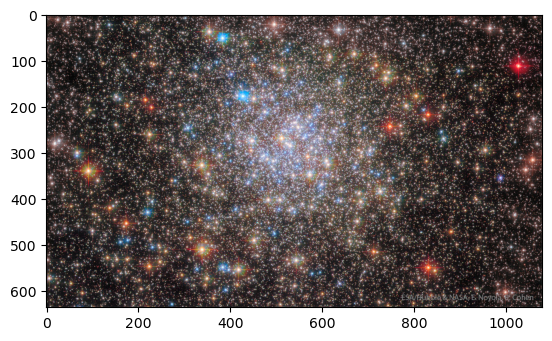

In [25]:

url = r["url"]
with urllib.request.urlopen(url) as url:
    s = url.read()
im = np.array(Image.open(io.BytesIO(s)))

plt.imshow(im)

# Back to EIA example

In [26]:
my_api_key = "5hPnULbtrhHk3j8BWkHdX5cVHzQhMq6DRIWEYzKT"

In [29]:
# The url that stores the EIA data
api_url = "https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/"

# The API key param and your API key
api_key = "?api_key="+my_api_key

# Selects just California and pulls data values
api_data_pull = "&facets[stateId][]=CA&data[]=value"

# Makes a GET request to pull the data
#response = requests.get(api_url+api_key+api_data_pull)
response = requests.get("https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/" \
                        "?api_key=5hPnULbtrhHk3j8BWkHdX5cVHzQhMq6DRIWEYzKT" \
                        "&facets[stateId][]=CA&data[]=value")
                        


# The response from the API in JSON form
r = response.json()

In [30]:
r["response"]["data"][0]

{'period': 1970,
 'sectorId': 'RC',
 'sector-name': 'Residential carbon dioxide emissions',
 'fuelId': 'CO',
 'fuel-name': 'Coal',
 'stateId': 'CA',
 'state-name': 'California',
 'value': 0.128968,
 'value-units': 'million metric tons of CO2'}